SPECIAL FUNCTIONS:
Legendre polynomials P_l(x) satisfy the following differential equation:
(1-x^2)y'' - 2xy' + l(l+1)y = 0

The angular component of the spherical Schrodinger equation which permits non-infinite solutions (l must be an integer, for having normalizable wave function for instance of the hydrogen atom)

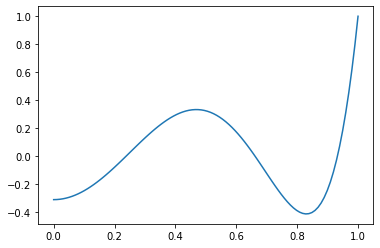

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
x = np.linspace(0,1,100)
plt.plot(x, legendre(6)(x)) #l=6
#plt.grid()
plt.show()

Bessel functions satisfy the following differential equation:
             x^2y'' + xy' + (x^2 - a^2)y = 0
Laplace's equation in polar coordinates.
a being an arbitrary complex number


In [3]:
from scipy.special import jv

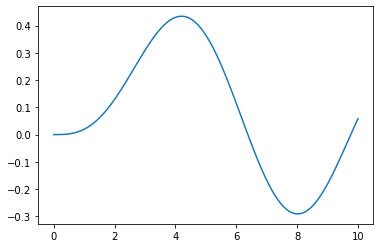

In [4]:
xx = np.linspace(0,10,100)
plt.plot(xx, jv(3,xx))
plt.show()

CALCULUS
DIFFERENTIATION
Also numpy treats it in a different manner wrt scipy (numpy is about specifically approximating things inside an array and computing derivatives that way from actual numerical data). Scipy takes in a function and evaluates the derivative by itself. Numpy says 'give me an array of values and I will ouptut the values of the derivative value in the points of the array' while scipy says 'give me a function and I will output the derivative fun by a special technique'.

In [5]:
from scipy.misc import derivative


In [6]:
def f(x):
    return x**2*np.sin(2*x)*np.exp(-x)

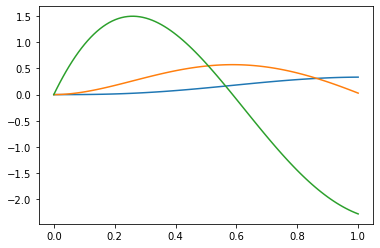

In [7]:
xd = np.linspace(0,1,100)
plt.plot(xd, f(xd))
plt.plot(xd, derivative(f, xd, dx=1e-6))
plt.plot(xd, derivative(f, xd, dx=1e-6, n=2))

INTEGRATION
While in numpy you have an array of values and it sums them up (using like a riemann sort of method) scipy does that behind the scenes.

In [8]:
from scipy.integrate import quad #1D integral
integrand = lambda x: x**2 * np.sin(x)*np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [9]:
integral

0.10246777930717413

In [10]:
integral_error

1.1376208786903388e-15

Double integral now

In [11]:
from scipy.integrate import dblquad

In [12]:
integrand = lambda x, y: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [13]:
integral

0.315802507240474

In [14]:
integral_error

1.5634600713498928e-14

In [15]:
from scipy.integrate import nquad

Wraps quad to enable integration over multiple variables. Various options allow improved integration of discontinuous functions, as well as the use of weighted integration, and generally finer control of the integration process.

Parameters
func : {callable, scipy.LowLevelCallable}
    The function to be integrated. Has arguments of x0, ... xn, t0, ... tm, where integration is carried out over x0, ... xn, which must be floats. Where t0, ... tm are extra arguments passed in args. Function signature should be func(x0, x1, ..., xn, t0, t1, ..., tm). Integration is carried out in order. That is, integration over x0 is the innermost integral, and xn is the outermost.

    If the user desires improved integration performance, then f may be a scipy.LowLevelCallable with one of the signatures:

        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)
    where n is the number of variables and args. The xx array contains the coordinates and extra arguments. user_data is the data contained in the scipy.LowLevelCallable.
ranges : iterable object
    Each element of ranges may be either a sequence of 2 numbers, or else a callable that returns such a sequence. ranges[0] corresponds to integration over x0, and so on. If an element of ranges is a callable, then it will be called with all of the integration arguments available, as well as any parametric arguments. e.g., if func = f(x0, x1, x2, t0, t1), then ranges[0] may be defined as either (a, b) or else as (a, b) = range0(x1, x2, t0, t1).
args : iterable object, optional
    Additional arguments t0, ..., tn, required by func, ranges, and opts.
opts : iterable object or dict, optional
    Options to be passed to quad. May be empty, a dict, or a sequence of dicts or functions that return a dict. If empty, the default options from scipy.integrate.quad are used. If a dict, the same options are used for all levels of integraion. If a sequence, then each element of the sequence corresponds to a particular integration. e.g., opts[0] corresponds to integration over x0, and so on. If a callable, the signature must be the same as for ranges. The available options together with their default values are:

epsabs = 1.49e-08
epsrel = 1.49e-08
limit = 50
points = None
weight = None
wvar = None
wopts = None
    For more information on these options, see quad and quad_explain.

full_output : bool, optional
    Partial implementation of full_output from scipy.integrate.quad. The number of integrand function evaluations neval can be obtained by setting full_output=True when calling nquad.

Returns
result : float
    The result of the integration.
abserr : float
    The maximum of the estimates of the absolute error in the various integration results.
out_dict : dict, optional
    A dict containing additional information on the integration.

See Also
quad : 1-D numerical integration
dblquad, tplquad : double and triple integrals
fixed_quad : fixed-order Gaussian quadrature
quadrature : adaptive Gaussian quadrature

In [16]:
from scipy import integrate
func = lambda x0,x1,x2,x3 : x0**2 + x1*x2 - x3**3 + np.sin(x0) + (1 if (x0-.2*x3-.5-.25*x1>0) else 0)
def opts0(*args, **kwargs):
    return {'points':[0.2*args[2] + 0.5 + 0.25*args[0]]}
integrate.nquad(func, [[0,1], [-1,1], [.13,.8], [-.15,1]], opts=[opts0,{},{},{}], full_output=True)
(1.5267454070738633, 2.9437360001402324e-14, {'neval': 388962})
scale = .1
def func2(x0, x1, x2, x3, t0, t1):
    return x0*x1*x3**2 + np.sin(x2) + 1 + (1 if x0+t1*x1-t0>0 else 0)
def lim0(x1, x2, x3, t0, t1):
    return [scale * (x1**2 + x2 + np.cos(x3)*t0*t1 + 1) - 1,scale * (x1**2 + x2 + np.cos(x3)*t0*t1 + 1) + 1]
def lim1(x2, x3, t0, t1):
    return [scale * (t0*x2 + t1*x3) - 1,scale * (t0*x2 + t1*x3) + 1]
def lim2(x3, t0, t1):
    return [scale * (x3 + t0**2*t1**3) - 1,scale * (x3 + t0**2*t1**3) + 1]
def lim3(t0, t1):
    return [scale * (t0+t1) - 1, scale * (t0+t1) + 1]
def opts0(x1, x2, x3, t0, t1):
    return {'points' : [t0 - t1*x1]}
def opts1(x2, x3, t0, t1):
    return {}
def opts2(x3, t0, t1):
    return {}
def opts3(t0, t1):
    return {}
integrate.nquad(func2, [lim0, lim1, lim2, lim3], args=(0,0),opts=[opts0, opts1, opts2, opts3])
#(25.066666666666666, 2.7829590483937256e-13)

(25.066666666666663, 2.782959048393725e-13)

ODEs
1st order


Air friction while falling:
v' - av^2 + b = 0, v(0)=0

                    

In [17]:
#Accroding to the problem, 
#you have to choose the solver that best fits the situation
from scipy.integrate import odeint

In [18]:
def dvdt(v, t):
    return 3*v**2 - 5
#a=3 and b=5 arbitrarily

In [19]:
v0=0

In [20]:
t=np.linspace(0,1,100)
sol=odeint(dvdt, v0, t)
sol

array([[ 0.        ],
       [-0.05047933],
       [-0.10080451],
       [-0.15082334],
       [-0.20038726],
       [-0.24935318],
       [-0.29758502],
       [-0.34495519],
       [-0.39134576],
       [-0.43664948],
       [-0.48077056],
       [-0.52362515],
       [-0.56514164],
       [-0.60526086],
       [-0.6439356 ],
       [-0.68113064],
       [-0.71682205],
       [-0.75099661],
       [-0.78365109],
       [-0.8147914 ],
       [-0.84443176],
       [-0.87259378],
       [-0.89930556],
       [-0.92460079],
       [-0.94851787],
       [-0.97109913],
       [-0.99239002],
       [-1.01243837],
       [-1.03129376],
       [-1.04900692],
       [-1.06562918],
       [-1.081212  ],
       [-1.0958066 ],
       [-1.10946355],
       [-1.12223249],
       [-1.13416195],
       [-1.14529906],
       [-1.15568941],
       [-1.16537698],
       [-1.17440397],
       [-1.18281086],
       [-1.19063623],
       [-1.19791686],
       [-1.20468768],
       [-1.21098179],
       [-1

In [21]:
sol.T[0] #solution arranged as an array of arrays in case of multiple ODEs system

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

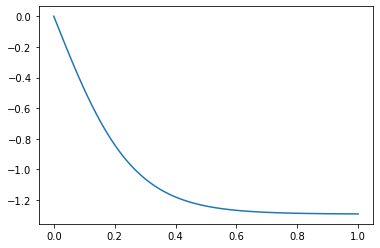

In [22]:
plt.plot(t,sol.T[0])

Coupled 1st order ODE:
y1'= y1 + y2 + 3x, y1(0)=0
y2'= 3y1 + y2^3 - cos(x), y2(0)=0
You have to vectorize the couple of functions

In [23]:
def dSdx(S, x):
    y1, y2 = S
    return [y1+y2+3*x, 3*y1-y2**3-np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [24]:
xx = np.linspace(0,1,100)
sol = odeint(dSdx, S_0, xx)

In [25]:
y1 = sol.T[0]
y2 = sol.T[1]

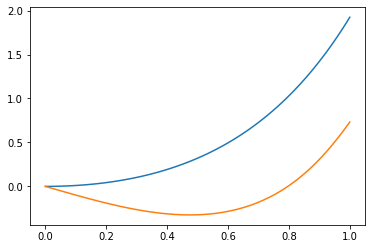

In [26]:
plt.plot(xx, y1)
plt.plot(xx, y2)

2ND ORDER ODEs
Scipy can only solve coupled 1st order ODE, but any 2nd order ODE may be turned into 2 coupled 1st order ODEs. The same thing goes for higher order ODEs. Define w (omega) = dtheta/dt.
dw/dt = sin(theta)
dtheta/dt = w.
Let S=(theta, w)

In [27]:
def dSdt(S, t):
    theta, omega = S
    return[omega, np.sin(theta)]

#ICs
theta0 = np.pi/4
omega0 = 0

In [28]:
S0 = (theta0, omega0)

In [29]:
t = np.linspace(0,20,100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

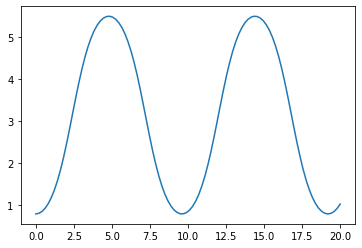

In [30]:
plt.plot(t,theta)


The blue curve looks like sine curve only if the theta is small. But given that initial condition (pi/4) we're no longer in this situation.

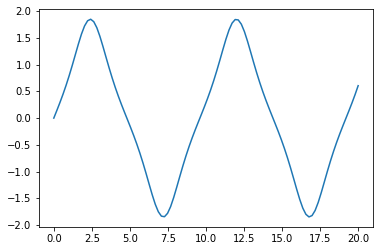

In [31]:
plt.plot(t,omega)

FOURIER TRANFORMS
Suppose to have a sort of time series (e.g. the oscillations of a guitar string) and you want to get the frequency domain of that time series to find the power at different frequencies. The discrete Fourier transform is defined as
y(k) = Σ(n=0, n=N-1) e^(-2πink/N) x(n)
-k/N represents a specific frequency (dimensionless)
-it can be converted to a frequency (Hz) if you know the spacing in x

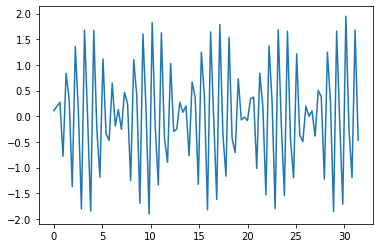

In [32]:
t=np.linspace(0,10*np.pi,100)
x=np.sin(2*np.pi*t)+np.sin(4*np.pi*t)+0.1*np.random.randn(len(t))
plt.plot(t,x)

In [33]:
from scipy.fft import fft, fftfreq
N = len(x)
y = fft(x)[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2]

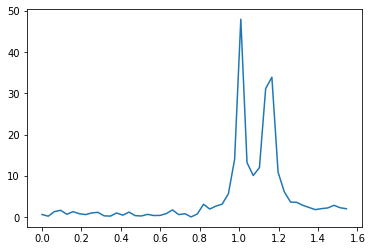

In [34]:
plt.plot(f, np.abs(y))

Symmetric chart good for any real value time series. The section of the chart on the left is the negative frequency component of that time series. Just take the positive part ([:N/2]) 

EXAMPLES OF PHYSICS PROBLEM SOLUTIONS BY SCIPY


**EXAMPLE 1**. The energy required to get from point $\vec{r}_1$ to point $\vec{r}_2$ for a plane is given by:
$$E = \alpha \int_{C} \left| \frac{d\vec{r}}{dt} \right| dt - \int_{C} \vec{F} \cdot \frac{d\vec{r}}{dt}dt $$
Suppose that $\alpha=5$ and our start and end points are $\vec{r}_1=(0,0)$ and $\vec{r}_2=(0,10)$. On this particular day, the wind produces a force field $\vec{F}=(0,-2/(x+1)^2)$. Find the optimum value of $A$ in $\vec{r}(t) = A\sin(\pi t/10)\hat(x) + t\hat(y)$ that minimizes the work.
Then $x=A\sin(\pi t/10)$, $y=t$, and
$$\left| \frac{d\vec{r}}{dt} \right| = \sqrt{1+(\pi A /10)^2 \cos^2(\pi t /10)}$$
$$\vec{F} \cdot \frac{d\vec{r}}{dt} = \begin{bmatrix} 0 \\ -2/(A\sin(\pi t/10)+1)^2\\ \end{bmatrix} \cdot \begin{bmatrix} \pi A/10 \cos(\pi t/10)\\ 1\\ \end{bmatrix} = -2/(A\sin(\pi t /10)+1)^2$$
So that,
$$E = \int_{0}^{10} \left(5\sqrt{1+(\pi A/10)^2 \cos^2(\pi t/10)} + \frac{2}{(A\sin(\pi t/10)+100)^2}\right)dt$$
It's all about integration and optimization.

In [35]:
from scipy.optimize import minimize 

In [36]:
def f(A):
    integrand = lambda t: 2 / (1+np.abs(A*np.sin(np.pi*t/10)))**2 + 5*np.sqrt(1+(np.pi*A/10)**2*np.cos(np.pi*t/10)**2)
    return quad(integrand, 0,10)[0]
minimize(f, 0.001).x

array([1.42591114])

**EXAMPLE 2**: Newton's law of cooling is
$$\frac{dT}{dt}=-h(T-T_s\left(t)\right)$$
where T is the temperature of an object in the surroundings with temperature $T_s(t)$ which may depend on time. Imagine T representing the temperature of a swallow pool of water and $T_s(t)$ represents the temperature outside. Find $T(t)$ given that you collected measurements of outside. It's all about interpolation and solving a 1st order ODE.

In [44]:
t_m = [0., 1.04347826, 2.08695652, 3.13043478, 4.17391304, 5.2173913, 6.26086957, 7.30434783, 8.34782609, 9.39130435, 10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565, 15.65217391, 16.69565217, 17.73913043, 18.7826087, 19.8260869565, 20.86956522, 21.91304348, 22.95652174, 24.]
np.size(t_m)

24

In [45]:
temp_m =[283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635, 291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675, 302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675, 298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635, 287.8603625, 286.2259041, 284.6945461, 283.2322975]
np.size(temp_m)

24

Text(0, 0.5, 'Temperature of outside [K]')

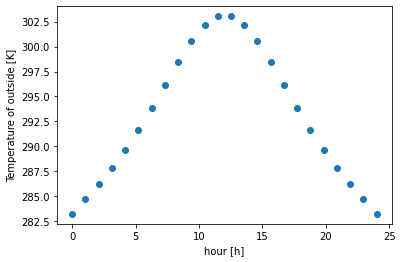

In [47]:
plt.scatter(t_m, temp_m)
plt.xlabel('hour [h]')
plt.ylabel('Temperature of outside [K]')


In [48]:
#Interpolation of the dataa from the measurements
from scipy.interpolate import interp1d

In [49]:
Ts = interp1d(t_m, temp_m, kind='cubic')

In [50]:
Ts(1.2345654)

array(284.96889871)

In [55]:
def dTdt(T,t):
    return -0.5*(T-Ts(t))

In [56]:
times = np.linspace(1,23,1000)
T0 = 284.6945461

In [57]:
sol = odeint(dTdt, T0, times).T[0]

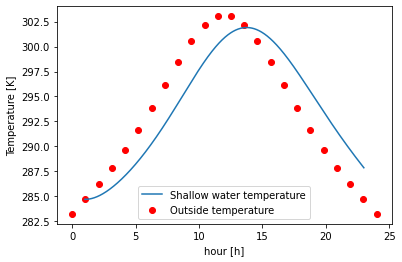

In [59]:
plt.plot(times, sol, label='Shallow water temperature')
plt.scatter(t_m, temp_m, color='r', label='Outside temperature')
plt.xlabel('hour [h]')
plt.ylabel('Temperature [K]')
plt.legend()

Typically you find these two couples: optimization-integration and interpolation-differential equation (ODE)